## Heart failure prediction using ML

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
X = df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:]=scaler.fit_transform(X)

/tmp/ipykernel_5113/2726236841.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7.13192141e-02 1.00000000e+00 1.56927788e-02 1.12273539e-02
 1.74789487e-02 3.06200561e-03 2.84511355e-02 3.72544016e-02
 1.70961980e-02 1.27583567e-02 7.39984690e-03 2.65373820e-02
 1.22225057e-01 1.84996172e-02 7.27226333e-03 4.54197499e-02
 1.60755295e-02 7.13192141e-02 1.30135239e-02 7.13192141e-02
 3.69992345e-03 1.33962746e-02 2.51339627e-02 5.10334269e-03
 7.13192141e-02 1.59479459e-02 1.13549375e-02 1.26307732e-02
 4.72059199e-03 5.99642766e-03 7.13192141e-02 0.00000000e+00
 2.88338862e-02 1.73513651e-02 9.05843327e-03 7.13192141e-02
 4.72059199e-03 1.06149528e-01 3.35927533e-01 2.70477163e-02
 7.13192141e-02 1.28859403e-02 6.99157948e-02 1.32686910e-02
 7.20847155e-02 7.13192141e-02 1.73130901e-01 7.13192141e-02
 6.76192906e-02 1.35238581e-02 7.06812962e-02 8.67568257e-03
 5.02806838e-01 5.86884409e-03 3.02373054e-02 4.4399

In [9]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235


In [14]:
X_train.shape ,X_test.shape

((239, 12), (60, 12))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
def kfold(estimate ,inp,tar):
    return cross_val_score(estimate ,inp,tar).mean() * 100

In [23]:
kfold(LogisticRegression(), X_train,y_train)

np.float64(83.23581560283688)

In [ ]:
kfold(SVC(), X_train,y_train)

In [25]:
kfold(RandomForestClassifier(), X_train,y_train)

np.float64(87.45567375886525)

In [33]:
clf= GridSearchCV(RandomForestClassifier(),{
    'n_estimators' :[50,100,150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4]

})
clf.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [35]:
clf_df = pd.DataFrame(clf.cv_results_)

In [36]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [37]:
clf_df[
    ['param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'mean_test_score']
].sort_values(by='mean_test_score', ascending=False)


,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score
14,5,3,150,0.891312
20,7,2,150,0.891223
2,3,2,150,0.887145
25,7,4,100,0.887145
16,5,4,100,0.887057
23,7,3,150,0.887057
21,7,3,50,0.882979
11,5,2,150,0.882979
9,5,2,50,0.882890
10,5,2,100,0.878812


In [40]:
model = RandomForestClassifier(n_jobs=1,
                                n_estimators=150,
                                max_depth =7,
                                min_samples_split=2)
model.fit(X_train,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_test[:5]

281    0
265    0
164    1
9      1
77     0
Name: DEATH_EVENT, dtype: int64

In [42]:
pred =model.predict(X_test)

In [43]:
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [44]:
accuracy_score(y_test,pred)*100

71.66666666666667

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60



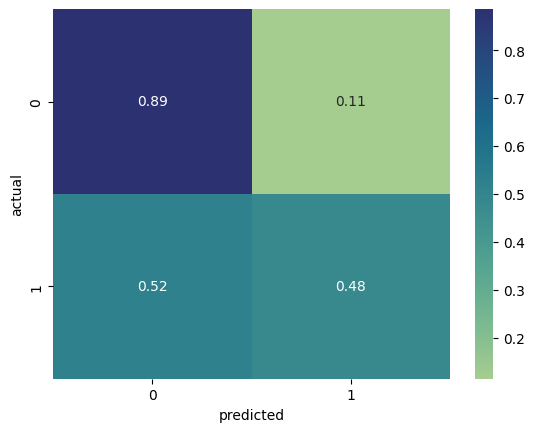

In [50]:
cf = confusion_matrix (y_test,pred, normalize='true')

sns.heatmap (cf,annot = True ,cmap ='crest')
plt.xlabel('predicted');
plt.ylabel('actual');

## Heart failure prediction using ANN

In [87]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML & DL imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [88]:
data = pd.read_csv('heart_failure_clinical_records.csv')

In [89]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [90]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


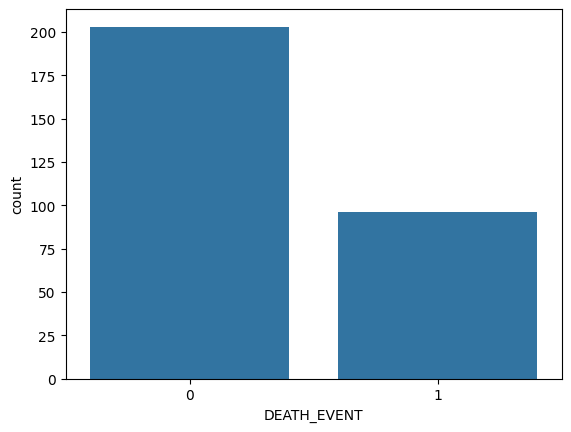

In [91]:
sns.countplot(x=data["DEATH_EVENT"])
plt.show()


In [92]:
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

In [93]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7
)

In [95]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(12,)),
    Dense(8, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/home/andriel/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [97]:
early_stop = EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True
)

In [98]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6145 - loss: 0.7207 - val_accuracy: 0.6667 - val_loss: 0.6704
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6369 - loss: 0.6972 - val_accuracy: 0.6000 - val_loss: 0.6662
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5978 - loss: 0.7213 - val_accuracy: 0.5778 - val_loss: 0.6616
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6648 - loss: 0.7358 - val_accuracy: 0.5778 - val_loss: 0.6588
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5810 - loss: 0.7087 - val_accuracy: 0.6222 - val_loss: 0.6548
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6089 - loss: 0.6794 - val_accuracy: 0.6222 - val_loss: 0.6506
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6369 - loss: 0.7134 - val_accuracy: 0.6222 - val_loss: 0.6459
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6648 - loss: 0.6775 - val_accuracy: 0.6444 - val_loss: 0.6419


In [99]:
val_accuracy = np.mean(history.history['val_accuracy'])
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


Validation Accuracy: 62.44%


In [100]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x71dae0364ea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step


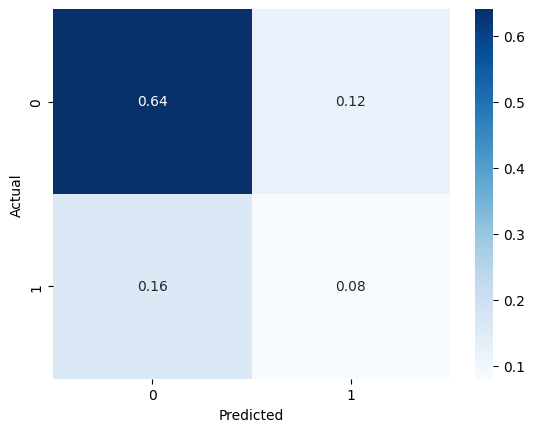

In [101]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm / cm.sum(), annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
